## Inciso A) Declaración de librerías, importar información y declarar núcleos de Spacy

In [1]:
# Importamos las librerías necesarias

# Librerías para el manejo de los datos
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim para la creación de modelos
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# SpaCy para el preprocesamiento de la información
import spacy

# Herramientas de plotteo
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Hacemos un Dataframe a partir del archivo de comentarios en -csv
df = pd.read_csv('D:\Documentos\Lenguaje natural\Reseñas_Comida_Modelado_Topicos.csv')

# Leemos el archivo .csv y asignamos sus valores en una base de datos
dfB = pd.DataFrame({'Texto Original': df['Text'],  'Texto': df['Texto']})
dfB.head(10)

C:\Users\mario\.conda\envs\actumlogos-cpu\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:2: DeprecationWarning: invalid escape sequence \D
<>:2: DeprecationWarning: invalid escape sequence \D
<>:2: DeprecationWarning: invalid escape sequence \D
<ipython-input-2-e0eb5fe42309>:2: DeprecationWarning: invalid escape sequence \D
  df = pd.read_csv('D:\Documentos\Lenguaje natural\Reseñas_Comida_Modelado_Topicos.csv')


,Texto Original,Texto
0,I have bought several of the Vitality canned d...,He comprado varios de los productos de aliment...
1,Product arrived labeled as Jumbo Salted Peanut...,El producto llegó etiquetado como Jumbo Cacahu...
2,This is a confection that has been around a fe...,Este es un dulce que ha sido de alrededor de u...
3,If you are looking for the secret ingredient i...,Si usted está buscando el ingrediente secreto ...
4,Great taffy at a great price. There was a wide...,Gran Taffy a muy buen precio. Había una gran v...
5,I got a wild hair for taffy and ordered this f...,Tengo un pelo salvaje para la melcocha y orden...
6,This saltwater taffy had great flavors and was...,Esta agua salada Taffy tenía excelentes sabore...
7,This taffy is so good. It is very soft and che...,Esta melcocha es tan bueno. Es muy suave y dur...
8,Right now I'm mostly just sprouting this so my...,En este momento estoy en su mayoría sólo brota...
9,This is a very healthy dog food. Good for thei...,Este es un alimento muy saludable perro. Bueno...


## Inciso B) Filtrado de StopWords

In [3]:
# Importamos el núcleo de trabajo en Español de spacy
import nltk
pln_es = spacy.load('es_core_news_sm')

# Importamos la librería con StopWords de NLTK
stop_words = nltk.corpus.stopwords.words('spanish')

C:\Users\mario\.conda\envs\actumlogos-cpu\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Filtrar StopWords (Añadir más si lo consideras necesario)
StopWords = ['br', 'si']

Textos_filtrados = list()

for Utterance in dfB['Texto']:
    Texto = ''
    # Por cada token, si no es una StopWord lo anexamos al texto
    for Token in pln_es(Utterance.lower()):
        if((Token.text not in stop_words) and (Token.text not in StopWords) and Token.text.isalpha() == True):
            Texto = Texto + ' ' + Token.text
    # Agregamos a la lista el Texto ya 'destokenizado'
    if len(Texto.split()) > 1:
        print(Texto)
        Textos_filtrados.append(Texto)

## Inciso C) Lista de tokens y verbos lematizados + Bi-Gramas, Tri-Gramas

In [5]:
# Agregamos los textos tokenizados a una lista:
data_words = list()

for Texto in Textos_filtrados:
    lista = list()
    for Token in pln_es(Texto):
        # Solo agregamos los tokens que no estén 'Vacíos'
        if Token.text != ' ':
            # Si la PoS del Token es un Verbo, lo lematizamos
            if Token.pos_ == 'VERB' or Token.pos_ == 'AUX':
                lista.append(Token.lemma_)
            else:
                lista.append(Token.text)
    data_words.append(lista)
    
print('Listas de palabras tokenizadas')
print(data_words[:5])

C:\Users\mario\.conda\envs\actumlogos-cpu\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Listas de palabras tokenizadas
[['comprado', 'varios', 'productos', 'alimentos', 'perros', 'enlatada', 'vitalidad', 'encontrado', 'buena', 'calidad', 'miradas', 'productos', 'guiso', 'carne', 'procesada', 'oler', 'mejor', 'labrador', 'meticuloso', 'aprecia', 'producto', 'mejor', 'mayoría'], ['producto', 'llegar', 'etiquetado', 'jumbo', 'cacahuetes', 'salados', 'cacahuetes', 'realmente', 'pequeño', 'tamaño', 'salir', 'seguro', 'error', 'vendedor', 'pretender', 'representar', 'producto', 'jumbo'], ['dulce', 'ser', 'alrededor', 'pocos', 'siglos', 'gelatina', 'luz', 'pillowy', 'cítricos', 'frutos', 'secos', 'caso', 'avellanas', 'corto', 'pequeños', 'cuadrados', 'luego', 'generosamente', 'recubiertos', 'azúcar', 'polvo', 'pequeño', 'bocado', 'cielo', 'demasiado', 'duro', 'sabrosa', 'recomer', 'deliciosa', 'golosina', 'familiarizado', 'historia', 'lewis', 'león', 'bruja', 'armario', 'tratamiento', 'seducir', 'edmund', 'vender', 'hermano', 'hermanas', 'bruja'], ['usted', 'buscar', 'ingredient

In [7]:
# Intentamos identificar palabras que puedan ser bigramas o trigramas
# Mientras más alto sea el Treshold, habrá menos frases que estén juntas
# y que puedan ser Bigramas o Trigramas
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=20) 
trigram = gensim.models.Phrases(bigram[data_words], threshold=20)  

# Obtener las listas de bigramas y trigramas
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# Ver ejemplo de cuales palabras se convirtieron en bi/trigramas
for i in range(20):
    print(trigram_mod[bigram_mod[data_words[i]]])

C:\Users\mario\.conda\envs\actumlogos-cpu\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['comprado', 'varios', 'productos', 'alimentos_perros', 'enlatada', 'vitalidad', 'encontrado', 'buena_calidad', 'miradas', 'productos', 'guiso', 'carne', 'procesada', 'oler', 'mejor', 'labrador', 'meticuloso', 'aprecia', 'producto', 'mejor', 'mayoría']
['producto', 'llegar', 'etiquetado', 'jumbo', 'cacahuetes', 'salados', 'cacahuetes', 'realmente', 'pequeño', 'tamaño', 'salir', 'seguro', 'error', 'vendedor', 'pretender', 'representar', 'producto', 'jumbo']
['dulce', 'ser', 'alrededor', 'pocos', 'siglos', 'gelatina', 'luz', 'pillowy', 'cítricos', 'frutos_secos', 'caso', 'avellanas', 'corto', 'pequeños', 'cuadrados', 'luego', 'generosamente', 'recubiertos', 'azúcar', 'polvo', 'pequeño', 'bocado', 'cielo', 'demasiado', 'duro', 'sabrosa', 'recomer', 'deliciosa', 'golosina', 'familiarizado', 'historia', 'lewis', 'león', 'bruja', 'armario', 'tratamiento', 'seducir', 'edmund', 'vender', 'hermano', 'hermanas', 'bruja']
['usted_buscar', 'ingrediente', 'secreto', 'robitussin', 'creer', 'encontra

## Inciso D) Tratamiento del texto

In [8]:
# Definimos funciones para el tratamiento del Texto:

# Remover StopWords ()
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

# Hacer Bigramas correspondientes
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

# Hacer Trigramas correspondientes
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

# Filtramos solo los Pronombres, Adjetivos, Verbos y Adverbios
def Filtro(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for Frase in texts:
        doc = pln_es(" ".join(Frase)) 
        texts_out.append([token.text for token in doc if token.pos_ in allowed_postags])
    return texts_out

C:\Users\mario\.conda\envs\actumlogos-cpu\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
# Removemos las StopWords
data_words_nostops = remove_stopwords(data_words)

# Formamos Bigramas
data_words_bigrams = make_bigrams(data_words_nostops)

# Filtramos los tokens para conservar solo los Pronombres, Adjetivos, Verbos y Adverbios
data_Filtrada = Filtro(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

# Imprimir los tokens que quedan al final
print(data_Filtrada[:5])

C:\Users\mario\.conda\envs\actumlogos-cpu\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['comprado', 'productos', 'alimentos_perros', 'enlatada', 'vitalidad', 'encontrado', 'buena_calidad', 'miradas', 'productos', 'guiso', 'carne', 'procesada', 'oler', 'mejor', 'labrador', 'meticuloso', 'producto', 'mejor', 'mayoría'], ['producto', 'llegar', 'etiquetado', 'jumbo', 'cacahuetes', 'salados', 'cacahuetes', 'realmente', 'pequeño', 'tamaño', 'salir', 'seguro', 'error', 'vendedor', 'pretender', 'representar', 'producto', 'jumbo'], ['ser', 'alrededor', 'siglos', 'gelatina', 'pillowy', 'cítricos', 'frutos_secos', 'caso', 'avellanas', 'corto', 'pequeños', 'cuadrados', 'luego', 'generosamente', 'recubiertos', 'azúcar', 'polvo', 'pequeño', 'bocado', 'cielo', 'demasiado', 'duro', 'sabrosa', 'deliciosa', 'golosina', 'familiarizado', 'armario', 'tratamiento', 'seducir', 'vender', 'hermano', 'hermanas', 'bruja'], ['usted_buscar', 'ingrediente', 'secreto', 'creer', 'encontrado', 'además', 'extracto', 'pedir', 'bueno', 'hacer', 'soda', 'cereza', 'sabor', 'medicinal'], ['gran', 'buen', 'pr

## Inciso E) Impresión de la frecuencia de cada token

In [10]:
# Creamos el diccionario con la frecuencia de repetición de cada token 
# (Por frase / entrada de texto)
id2word = corpora.Dictionary(data_Filtrada)

# Asignamos una variable que usaremos de "Corpus" o frases
texts = data_Filtrada

# Obtenemos el valor de Tf (Term Frequency)
# Para cada token y con eso generamos el corpus
# Cada token tiene asignado un Id secuencial
corpus = [id2word.doc2bow(text) for text in texts]

# Imprimimos los valores de cada uno
print(corpus[:5])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 2), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 2), (16, 1)], [(14, 2), (17, 2), (18, 1), (19, 1), (20, 2), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1)], [(22, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1)], [(4, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1)], [(42, 1), (76, 1), (77, 1), (78, 2), (79, 2), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1)]]


C:\Users\mario\.conda\envs\actumlogos-cpu\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\mario\.conda\envs\actumlogos-cpu\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0, 0.5, 'Term frequency')

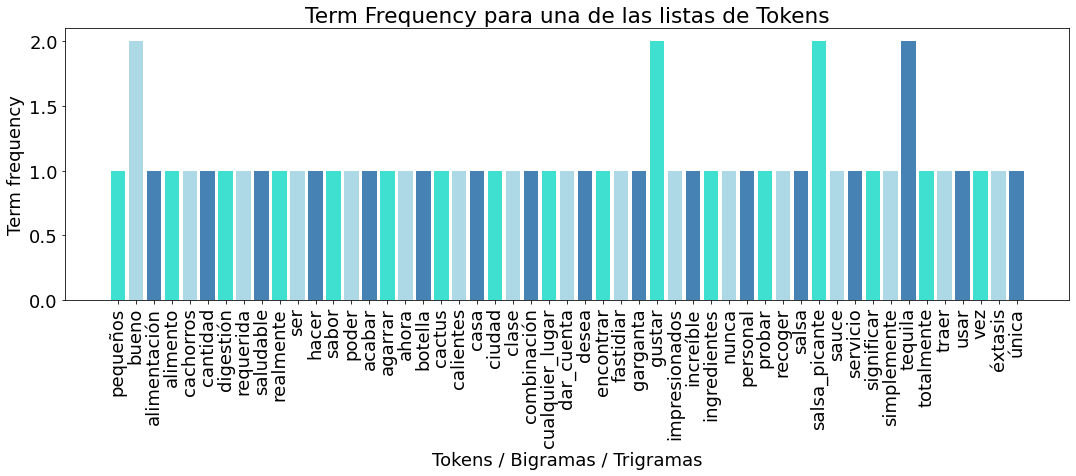

In [11]:
# Generamos un diccionario dónde se agregan los tokens / bigramas / trigramas 
# y su correspondiente tf (term-frequency) para poder imprimir una gráficas
# de barras y visualizar la información de manera más sencilla
Corpus_Tokens_Freq = dict()

for cp in corpus[9:11]:
    # Corpus nos regresa el Id y la Frecuencia de cada Token
    for id, freq in cp:
        if id2word[id] not in Corpus_Tokens_Freq: 
            Corpus_Tokens_Freq.setdefault(id2word[id], freq)
        else:
            Corpus_Tokens_Freq[id2word[id]] += freq


# Ploteamos la gráfica correspondiente al ejemplo anterior
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(18,5))
plt.title('Term Frequency para una de las listas de Tokens')
plt.bar(Corpus_Tokens_Freq.keys(), Corpus_Tokens_Freq.values(), color=['turquoise', 'lightblue', 'steelblue']) 
plt.xticks(rotation=90)
plt.xlabel("Tokens / Bigramas / Trigramas") 
plt.ylabel("Term frequency")

## Inciso F) Implementar algoritmo LDA 

In [12]:
# Construcción del modelo LDA
# Corpus       -> Conjunto de textos / documentos
# id2word      -> Diccionario con los Ids por Token
# num_topics   -> Cantidad de tópicos que se desean extraer
# random_state -> Semilla para reproducir los resultados
# update_every -> Tras cada iteración se actualizan todos los documentos
# chunksize    -> # de documentos que se analizan en cada iteracion
# alpha        -> Valor de Alfa que indica la prioridad correspondiente
#                 que tiene cada tópico, en auto, las prioridades se
#                 asignan de manera asimétrica y automática
# per_work_topics -> Extrae una lista del tópico más probable para
#                    cada token extraido
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           alpha='auto',
                                           per_word_topics=True)

C:\Users\mario\.conda\envs\actumlogos-cpu\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
# Imprimimos las palabras más importantes que se 
# obtuvieron para cada tópico, así como su valor 
# de prioridad para dicho tópico
pprint(lda_model.print_topics())

[(0,
  '0.016*"sabor" + 0.013*"favorito" + 0.011*"hacer" + 0.011*"parecer" + '
  '0.010*"venir" + 0.009*"entonces" + 0.009*"gustar" + 0.009*"mal" + '
  '0.008*"encantar" + 0.008*"bien"'),
 (1,
  '0.025*"sabor" + 0.015*"poder" + 0.015*"hacer" + 0.013*"calorías" + '
  '0.013*"querer" + 0.010*"sólo" + 0.009*"bueno" + 0.009*"pedir" + '
  '0.009*"pensar" + 0.009*"decir"'),
 (2,
  '0.024*"esperar" + 0.012*"saludables" + 0.010*"sal_mar" + 0.008*"después" + '
  '0.007*"golosinas" + 0.007*"contar" + 0.007*"pasta" + 0.006*"té" + '
  '0.006*"preparar" + 0.006*"paquetes"'),
 (3,
  '0.018*"sabor" + 0.016*"poder" + 0.014*"sólo" + 0.014*"chips" + 0.012*"gran" '
  '+ 0.012*"comer" + 0.011*"ir" + 0.010*"tan" + 0.010*"comprar" + '
  '0.010*"bolsa"'),
 (4,
  '0.022*"poder" + 0.020*"hacer" + 0.018*"sabor" + 0.017*"gustar" + '
  '0.011*"mejor" + 0.011*"tiempo" + 0.010*"bien" + 0.010*"disfrutar" + '
  '0.010*"chips" + 0.010*"sabores"')]


C:\Users\mario\.conda\envs\actumlogos-cpu\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
# Cálculo de la coherencia del modelo, el cuál indica que tan buena es la división de los tópicos
# Mientras más alto es mejor. 
# model      -> modelo de LDA definido
# texts      -> textos del corpus con el que se clasificaron los modelos
# dictionary -> tokens únicos con los que se creó el modelo de LDA
# coherence  -> métdo para el cálculo de la coherencia
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_Filtrada, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nScore de Coherencia: ', coherence_lda)

C:\Users\mario\.conda\envs\actumlogos-cpu\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Score de Coherencia:  0.37479858854306236


In [15]:
# Visualización de tópicos
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

C:\Users\mario\.conda\envs\actumlogos-cpu\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.132572  0.006530       1        1  33.980004
4      0.058488 -0.061817       2        1  21.206901
1      0.054514 -0.075589       3        1  20.441461
0     -0.030930  0.190307       4        1  16.129222
2     -0.214644 -0.059431       5        1   8.242413, topic_info=           Term        Freq       Total Category  logprob  loglift
239     esperar  115.000000  115.000000  Default  30.0000  30.0000
601      querer  159.000000  159.000000  Default  29.0000  29.0000
265    favorito  128.000000  128.000000  Default  28.0000  28.0000
86        bolsa  210.000000  210.000000  Default  27.0000  27.0000
980   disfrutar  125.000000  125.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
565    mantener   24.654064   77.978770   Topic5  -5.2872   1.3444
1058     perros   24.451678   79.106426   Topic5  -5.2954   1.3218
646     primera   20.828050   46.050743   Topic5  -5.4558   1.7024
1241   calorías   27.825722  279.492997   Topic5  -5.1662   0.1889
434       decir   25.593549  269.321922   Topic5  -5.2498   0.1423

[342 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
950       1  0.837114    abrir
950       3  0.074410    abrir
950       4  0.083711    abrir
3221      1  0.959854  abrirlo
3221      3  0.025942  abrirlo
...     ...       ...      ...
1508      5  0.956786    ácido
183       4  0.982494    única
344       1  0.964648    único
344       4  0.041049    único
1153      5  0.922449     útil

[596 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 5, 2, 1, 3])

## Inciso G) Análisis de coherencia en el modelo

In [16]:
# Generamos un método que evalúe la Coherencia de cada Modelo que se genere
# con una cantidad específica de Tópicos entre un valor inicial y uno final
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        # Utilizamos los mísmos métodos que en las celdas anteriores
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        print('Cantidad de Tópicos: ' + str(num_topics) + ' | Coherencia: ' + str(coherencemodel.get_coherence()))

    return model_list, coherence_values

C:\Users\mario\.conda\envs\actumlogos-cpu\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
# Llamamos al método anterior con los parámetros que queramos evaluar (Límite, Inicio y Paso)
model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        texts=data_Filtrada, 
                                                        limit=30, 
                                                        start=2, 
                                                        step=2)

C:\Users\mario\.conda\envs\actumlogos-cpu\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Cantidad de Tópicos: 2 | Coherencia: 0.4505771938233779
Cantidad de Tópicos: 4 | Coherencia: 0.4495956088099433
Cantidad de Tópicos: 6 | Coherencia: 0.43063939305368576
Cantidad de Tópicos: 8 | Coherencia: 0.4482516068076099
Cantidad de Tópicos: 10 | Coherencia: 0.4421350919749528
Cantidad de Tópicos: 12 | Coherencia: 0.44326825760724714
Cantidad de Tópicos: 14 | Coherencia: 0.4506389181299606
Cantidad de Tópicos: 16 | Coherencia: 0.44370947553786805
Cantidad de Tópicos: 18 | Coherencia: 0.4499280480390865
Cantidad de Tópicos: 20 | Coherencia: 0.4441640723543883
Cantidad de Tópicos: 22 | Coherencia: 0.4319294845605995
Cantidad de Tópicos: 24 | Coherencia: 0.4416779863435009
Cantidad de Tópicos: 26 | Coherencia: 0.442703277993808
Cantidad de Tópicos: 28 | Coherencia: 0.4350147496018657


C:\Users\mario\.conda\envs\actumlogos-cpu\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


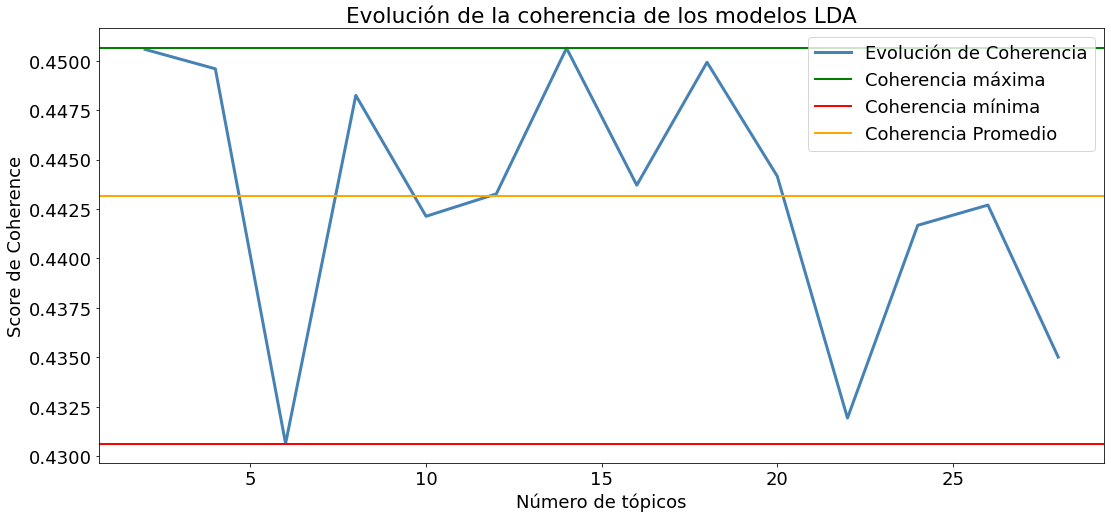

In [19]:
# Plotteamos la gráfica que muestra la evaluación
# de la coherencia según la cantidad de tópicos
limit=30 
start=2
step=2
# Obtenemos los valores de X para el eje horizontal
# de la gráfica
x = range(start, limit, step)
# Parámetros para el protteo de la gráfica
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(18,8))
plt.title('Evolución de la coherencia de los modelos LDA')
plt.plot(x, coherence_values, color = 'steelblue', lw=3)
plt.xlabel("Número de tópicos")
plt.ylabel("Score de Coherence")
# Líneas horizontales para señalar valor mínimo, máximo y promedio
plt.axhline(max(coherence_values), lw =2, c='g')
plt.axhline(min(coherence_values), lw =2, c='r')
plt.axhline(sum(coherence_values)/len(coherence_values), lw =2, c='orange')
plt.legend(['Evolución de Coherencia', 'Coherencia máxima', 'Coherencia mínima', 'Coherencia Promedio'])